Import libraries

In [1]:
# Data analysis and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Stadistical analysis and data preprocessing
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro

# Machine learning predicction 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

Reading csv

In [2]:
df = pd.read_csv(r'C:\Users\Ral\Desktop\Project_Oslo\listings.csv')
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.replace("\n", " ", regex=False)
    print(df[col].head())

0                     Fin enebolig i utkanten av Oslo
1                 Charming apartment, Oslo Center, Ro
2                  Central big room - ap with balcony
3                 Eclectic design home, super central
4    Cozy room in design apartment, central east side
Name: name, dtype: object
0    Lars Kristian
1          Cecilie
2           Reidun
3          Melissa
4          Melissa
Name: host_name, dtype: object
0          Alna
1       Frogner
2    Gamle Oslo
3    Gamle Oslo
4    Gamle Oslo
Name: neighbourhood, dtype: object
0    Entire home/apt
1    Entire home/apt
2       Private room
3    Entire home/apt
4       Private room
Name: room_type, dtype: object
0    2024-08-03
1    2024-08-25
2    2024-05-15
3    2024-08-03
4    2024-08-11
Name: last_review, dtype: object


We read "listing.csv.gz" from url for weight reasons and merge it in the principal document

In [3]:
Url = r"https://data.insideairbnb.com/norway/oslo/oslo/2024-09-28/data/listings.csv.gz"
dfgz = pd.read_csv(Url, compression='gzip') # no es necesario comentar el formato

# We choosed the list and then merged takin as reference "id"
dfgz_selected = dfgz[['id', 'bathrooms', 'amenities', 'bedrooms', 'beds', "accommodates", "first_review", "review_scores_rating"]]
df_merged = pd.merge(df, dfgz_selected, on='id', how='left')

#Showing dataframe merged
df_merged.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,number_of_reviews_ltm,license,bathrooms,amenities,bedrooms,beds,accommodates,first_review,review_scores_rating
0,1134705943340042285,Fin enebolig i utkanten av Oslo,18365661,Lars Kristian,NaN,Alna,59.910265,10.862719,Entire home/apt,NaN,...,0,1,NaN,NaN,"[""Wine glasses"", ""Free parking on premises"", ""...",3.0,NaN,6,2024-08-03,5.00
1,42932,"Charming apartment, Oslo Center, Ro",187463,Cecilie,NaN,Frogner,59.912010,10.724550,Entire home/apt,3400.0,...,334,3,NaN,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""C...",2.0,3.0,3,2013-09-02,4.91
2,71725,Central big room - ap with balcony,368229,Reidun,NaN,Gamle Oslo,59.907950,10.779870,Private room,586.0,...,334,2,NaN,1.0,"[""Wine glasses"", ""Cooking basics"", ""Blender"", ...",1.0,2.0,2,2011-02-15,4.75
3,85902,"Eclectic design home, super central",250159,Melissa,NaN,Gamle Oslo,59.910740,10.772320,Entire home/apt,NaN,...,0,4,NaN,NaN,"[""Wine glasses"", ""Room-darkening shades"", ""Coo...",2.0,NaN,4,2011-05-28,4.77
4,123041,"Cozy room in design apartment, central east side",250159,Melissa,NaN,Gamle Oslo,59.912530,10.772050,Private room,NaN,...,0,1,NaN,NaN,"[""Wine glasses"", ""Room-darkening shades"", ""Coo...",NaN,NaN,2,2011-06-16,4.82


Security copy

In [4]:
df = df_merged.copy()

Datacheck

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10452 entries, 0 to 10451
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10452 non-null  int64  
 1   name                            10452 non-null  object 
 2   host_id                         10452 non-null  int64  
 3   host_name                       10452 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10452 non-null  object 
 6   latitude                        10452 non-null  float64
 7   longitude                       10452 non-null  float64
 8   room_type                       10452 non-null  object 
 9   price                           8252 non-null   float64
 10  minimum_nights                  10452 non-null  int64  
 11  number_of_reviews               10452 non-null  int64  
 12  last_review                     

Outlier removal and logarithmic transformation

In [6]:
# We manage "price" outliers with iqr
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
Inf = Q1 - 3 * IQR
Sup = Q3 + 3 * IQR
df = df[(df['price'] >= Inf) & (df['price'] <= Sup)]

# We def log transformation in "price"
df['price_log'] = np.log1p(df['price'])

# We encode categorical variables
df = pd.get_dummies(df, columns=['room_type', 'neighbourhood_group'], drop_first=True)

# We do the check
print(df.isnull().sum())
print(df.dtypes)  


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1637
reviews_per_month                 1637
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           8054
bathrooms                            6
amenities                            0
bedrooms                             5
beds                                 1
accommodates                         0
first_review                      1637
review_scores_rating              1637
price_log                            0
room_type_Hotel room                 0
room_type_Private room   

Now we're going to create some variables to have a better view of info for the columns: Amenities and Pets 

In [7]:
# We split amenities in a list and then we count the number of each list
df['amenities_count'] = df['amenities'].str.split(',').apply(len)
df[['amenities', 'amenities_count']]  #nuevo dataframe, contando cada ammenitie, descontar obligaciones legales

,amenities,amenities_count
1,"[""Room-darkening shades"", ""Cooking basics"", ""C...",44
2,"[""Wine glasses"", ""Cooking basics"", ""Blender"", ...",57
5,"[""Patio or balcony"", ""Cooking basics"", ""City s...",30
6,"[""Wine glasses"", ""HDTV with Chromecast"", ""Room...",39
8,"[""Wine glasses"", ""Waterfront"", ""Room-darkening...",69
...,...,...
10447,"[""TV"", ""Fire extinguisher"", ""Wifi"", ""Carbon mo...",11
10448,"[""TV"", ""Wifi"", ""Host greets you"", ""Pets allowe...",10
10449,"[""TV"", ""Fire extinguisher"", ""Wifi"", ""Kitchen"",...",8
10450,"[""TV"", ""Fire extinguisher"", ""Wifi"", ""Indoor fi...",8


We add a boolean column that indicates if pets are allowed or not, we search the key word "pet and pets" in amenities column

In [8]:
def check_pet(row):
    return "pet" in row["amenities"].lower() or "pets" in row["amenities"].lower()
       

df["has_pet"] = df.apply(lambda row: check_pet(row), axis=1)

print(df["has_pet"].head())  
# optimizado

1    False
2     True
5    False
6    False
8    False
Name: has_pet, dtype: bool


Data cleaning

In [9]:
#We start getting info of the whole df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8054 entries, 1 to 10451
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8054 non-null   int64  
 1   name                            8054 non-null   object 
 2   host_id                         8054 non-null   int64  
 3   host_name                       8054 non-null   object 
 4   neighbourhood                   8054 non-null   object 
 5   latitude                        8054 non-null   float64
 6   longitude                       8054 non-null   float64
 7   price                           8054 non-null   float64
 8   minimum_nights                  8054 non-null   int64  
 9   number_of_reviews               8054 non-null   int64  
 10  last_review                     6417 non-null   object 
 11  reviews_per_month               6417 non-null   float64
 12  calculated_host_listings_count  8054 n

Checking dates

In [10]:
#We checked time system, is already in UTC
print(df["last_review"].head())  #

1    2024-08-25
2    2024-05-15
5    2024-07-02
6    2024-09-10
8    2024-09-20
Name: last_review, dtype: object


Counting of null values

In [11]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1637
reviews_per_month                 1637
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           8054
bathrooms                            6
amenities                            0
bedrooms                             5
beds                                 1
accommodates                         0
first_review                      1637
review_scores_rating              1637
price_log                            0
room_type_Hotel room                 0
room_type_Private room   

Proportion of null values

In [12]:
faltantes = df.isnull().sum()
faltantes[faltantes > 0]/len(df)*100 # esteticamente mejorado

last_review              20.325304
reviews_per_month        20.325304
license                 100.000000
bathrooms                 0.074497
bedrooms                  0.062081
beds                      0.012416
first_review             20.325304
review_scores_rating     20.325304
dtype: float64

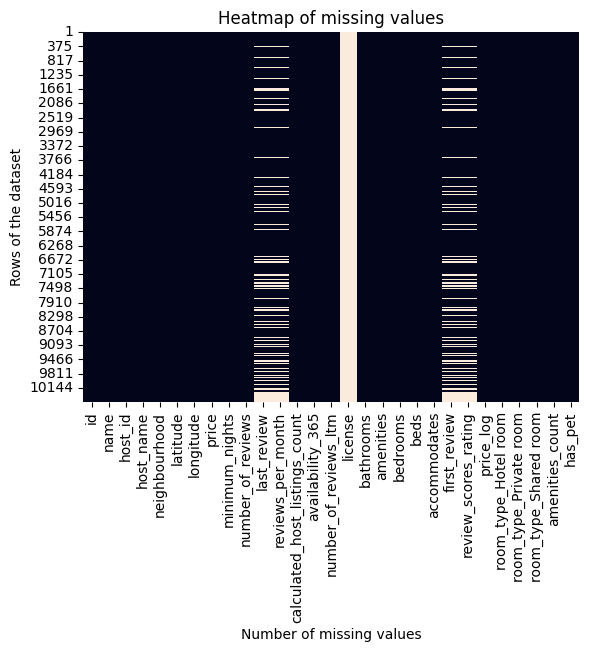

In [13]:
sns.heatmap(df.isnull(), cbar=False)
plt.xlabel("Number of missing values")
plt.ylabel("Rows of the dataset")
plt.title("Heatmap of missing values")
plt.show()
# Neighbourhood:group and license are gone, and the firts values of firts_review and score_rating too.

In [14]:
#check of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8054 entries, 1 to 10451
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8054 non-null   int64  
 1   name                            8054 non-null   object 
 2   host_id                         8054 non-null   int64  
 3   host_name                       8054 non-null   object 
 4   neighbourhood                   8054 non-null   object 
 5   latitude                        8054 non-null   float64
 6   longitude                       8054 non-null   float64
 7   price                           8054 non-null   float64
 8   minimum_nights                  8054 non-null   int64  
 9   number_of_reviews               8054 non-null   int64  
 10  last_review                     6417 non-null   object 
 11  reviews_per_month               6417 non-null   float64
 12  calculated_host_listings_count  8054 n

Next column to check is "price"

Fixing "firts_review" and "review_scores_rating" columns

In [15]:
df = df.dropna(subset=['first_review', 'review_scores_rating'])

df.reset_index(drop=True, inplace=True)

Imputing missing price values using K-nearest neighbors (KNN) with feature scaling and categorical encoding

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer

# Copy of the original dataframe 
df_scaled = df.copy()

# Check if the necessary columns exist
required_columns = ["room_type", "accommodates", "amenities_count", "has_pet", "latitude", "longitude", "price"]
missing_columns = [col for col in required_columns if col not in df_scaled.columns]

if missing_columns:
    print(f"Error: Missing columns in the dataframe: {missing_columns}")
else:
    # Impute missing "price" values with the median
    df_scaled['price'] = df_scaled['price'].fillna(df_scaled['price'].median())

    # Encoding categorical variable "room_type"
    room_type_dict = {"Entire home/apt": 0, "Private room": 1, "Shared room": 2, "Hotel room": 3}
    df_scaled["room_type"] = df_scaled["room_type"].map(room_type_dict)

    # Selecting columns to be used as predictors of "price"
    columns = ["room_type", "accommodates", "amenities_count", "has_pet", "latitude", "longitude"]
    df_scaled = df_scaled[columns + ["price"]]  # Include "price" in the dataframe

    # Handling missing values in predictor columns (excluding "price") with imputation
    imputer = SimpleImputer(strategy="mean")
    df_scaled[columns] = imputer.fit_transform(df_scaled[columns])

    # Normalizing predictor variables (excluding "price")
    scaler = StandardScaler()
    df_scaled[columns] = scaler.fit_transform(df_scaled[columns])

    # Splitting the dataframe into rows with and without "price"
    df_with_price = df_scaled.dropna(subset=["price"])
    df_without_price = df_scaled[df_scaled["price"].isna()].drop(columns="price")

    # Checking if there's enough data
    if df_with_price.empty:
        print("Error: No valid values in 'price' to train the model.")
    else:
        # Create KNN model k=215
        model1 = KNeighborsRegressor(n_neighbors=215)

        # Training model with "price"
        model1.fit(df_with_price.drop(["price"], axis=1), df_with_price["price"])

        # Verify if there are missing values in "price" to predict
        if df_without_price.empty:
            print("Error: No missing values in 'price' for prediction.")
        else:
            # Predict "price" values for rows with missing values
            predictions = model1.predict(df_without_price)
            print(f"Predicted missing values are: {predictions}")

            # Impute predicted "price" values back into the original dataframe
            df_price_knn = df_scaled.copy()
            df_price_knn.loc[df_price_knn["price"].isna(), "price"] = predictions

            # Displaying dataframe
            print(df_price_knn.head())


Error: Missing columns in the dataframe: ['room_type']


Verifying

In [17]:
missing_values_count = df['price'].isna().sum()
print(f"Number of missing values in 'price': {missing_values_count}")

Number of missing values in 'price': 0


Check price

In [18]:
print(df["price"].head())

0    3400.0
1     586.0
2    1055.0
3     520.0
4     871.0
Name: price, dtype: float64


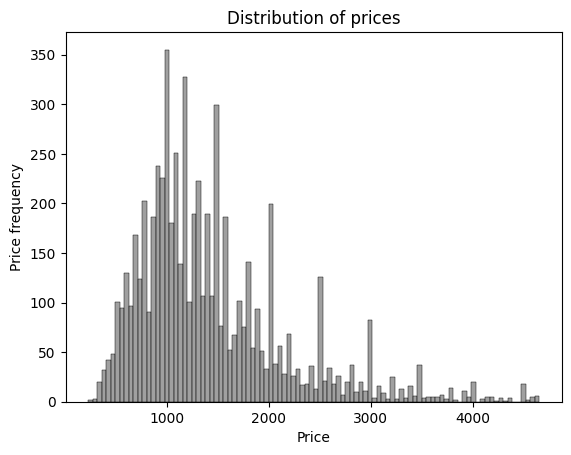

In [19]:
sns.histplot(data=df["price"], bins=100, color="Grey")
df[["price"]].describe().T
plt.xlabel("Price")
plt.ylabel("Price frequency")
plt.title("Distribution of prices")
plt.show()
# titulo, precio(€), explicar ejes, y ajustar outliers 

Comparison between vanilla distribution and transformed distribution

Text(0, 0.5, 'Frecuency')

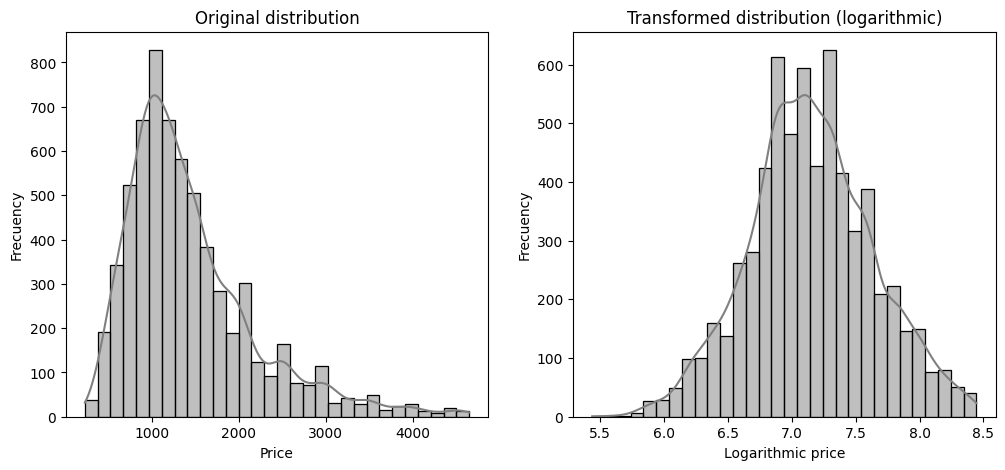

In [20]:
# copy df
df_with_log = df.copy()

# Apply log transformation to the 'price' column
df_with_log["log_price"] = np.log1p(df_with_log["price"])  
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram of original price distribution
sns.histplot(data=df["price"], bins=30, color= "grey", kde=True, ax=axes[0]) 
axes[0].set_title("Original distribution") 
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frecuency")

# Plot histogram of logarithmic transformed price distribution
sns.histplot(data=df_with_log['log_price'], bins=30, color = "grey", kde=True, ax=axes[1]) 
axes[1].set_title("Transformed distribution (logarithmic)") 
axes[1].set_xlabel("Logarithmic price")
axes[1].set_ylabel("Frecuency")
# no utilizar "vanilla"

Removing of useless columns

In [21]:
df_cleaned = df.drop(columns=["license"]) # <- neighrbourgroups
print(df_cleaned.shape)

(6417, 28)


Datacheck

In [22]:
print(df.isnull().sum())
print(df.describe())

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6417
bathrooms                            3
amenities                            0
bedrooms                             4
beds                                 1
accommodates                         0
first_review                         0
review_scores_rating                 0
price_log                            0
room_type_Hotel room                 0
room_type_Private room   

Correction of columns last_reviews and reviews_per_month

In [23]:
# Checking of null values before imputing "moda"
if df["last_review"].isnull().sum() > 0:
    moda_last_review = df["last_review"].mode() 
    if not moda_last_review.empty:
        df["last_review"] = df["last_review"].fillna(moda_last_review[0])
    else:
        print("No values on 'last_review' for mode")
else:
    print("No null values on 'last_review'")

# Checking of null values before imputing "average" on "reviews_per_month"
if df["reviews_per_month"].isnull().sum() > 0:
    df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())
else:
    print("No null values on 'reviews_per_month'")


No null values on 'last_review'
No null values on 'reviews_per_month'


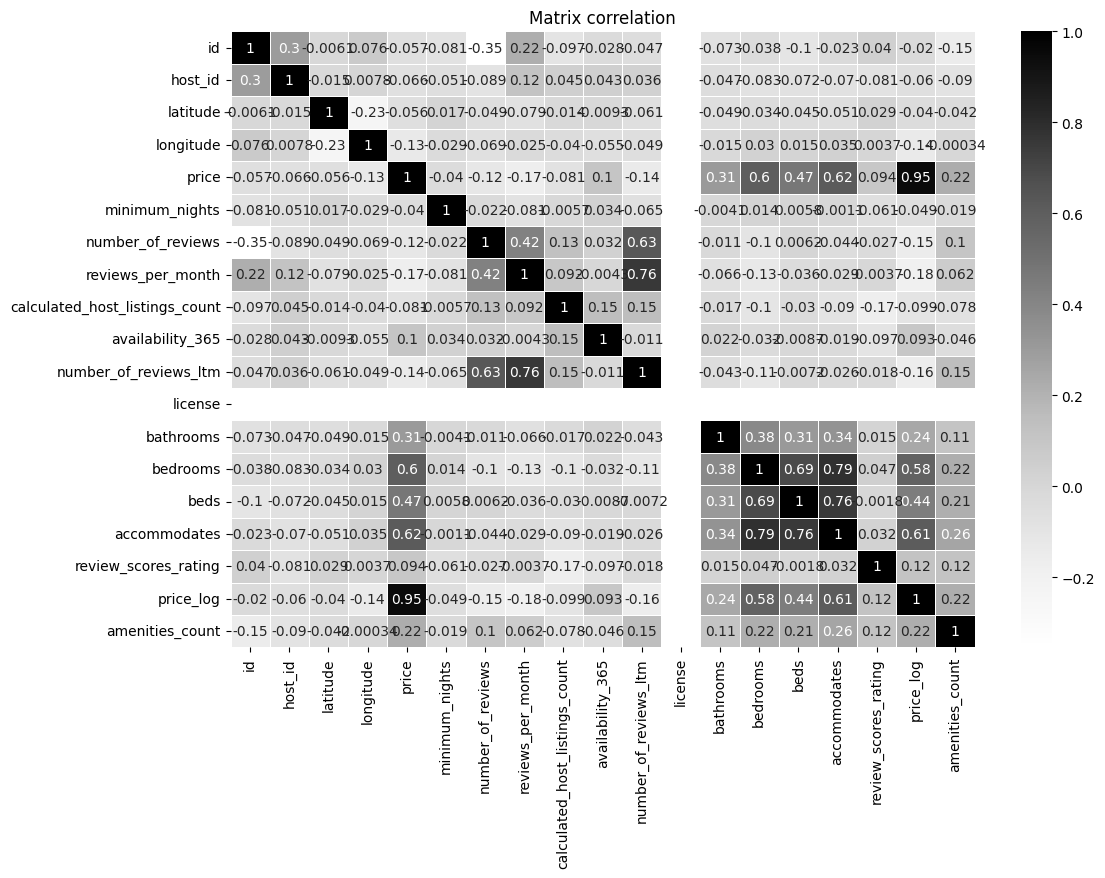

In [24]:
numerical_cols = df.select_dtypes(include=["float64", "int64"])

# calc of matrix correlation
correlation_matrix = numerical_cols.corr()

#  showing matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap= "Greys", linewidths=0.5)
plt.title("Matrix correlation")
plt.show()


In [25]:
print(df.describe())

                 id       host_id     latitude    longitude        price  \
count  6.417000e+03  6.417000e+03  6417.000000  6417.000000  6417.000000   
mean   7.283566e+17  1.774049e+08    59.921346    10.759904  1440.067165   
std    4.424514e+17  1.804094e+08     0.019657     0.041446   744.578009   
min    4.293200e+04  4.306700e+04    59.817260    10.627710   230.000000   
25%    5.680420e+17  3.374982e+07    59.912970    10.738260   949.000000   
50%    8.989428e+17  9.502467e+07    59.921931    10.762498  1250.000000   
75%    1.092020e+18  2.771806e+08    59.930933    10.778904  1757.000000   
max    1.249190e+18  6.523411e+08    60.035063    10.931090  4650.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     6417.000000        6417.000000        6417.000000   
mean         3.615085          24.831230           1.422214   
std         12.354624          53.904321           1.659881   
min          1.000000           1.000000           0.010000   


Visualizations

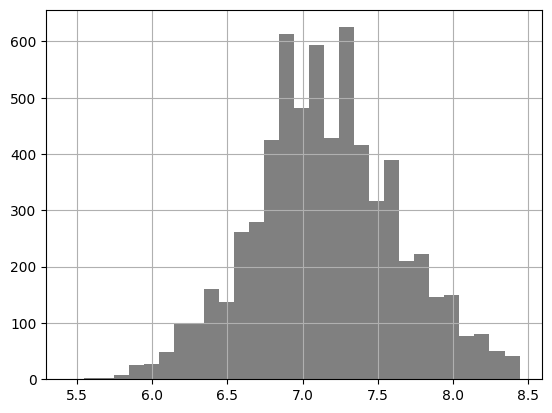

In [26]:
df['price_log'].hist(bins=30, color = "grey" )
plt.show()

In [27]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'bathrooms',
       'amenities', 'bedrooms', 'beds', 'accommodates', 'first_review',
       'review_scores_rating', 'price_log', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'amenities_count',
       'has_pet'],
      dtype='object')


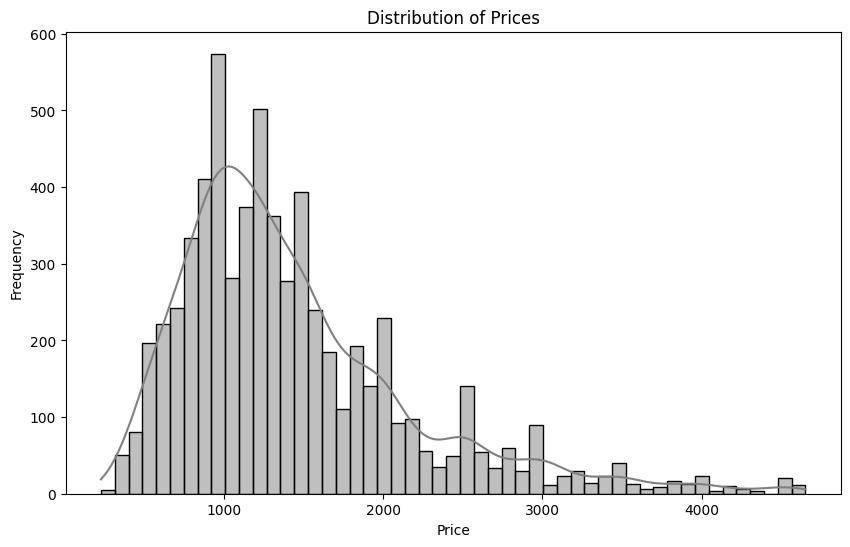

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color="Grey")
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Test of Shappiro-Wilk

In [29]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Eliminar los valores NaN de la columna antes de generar el histograma y aplicar la prueba de normalidad
    clean_column = df[column].dropna()

    #  Applying Shappire test
    stat, p = shapiro(clean_column)
    print(f'Estadístico={stat}, p-value={p}')
    
    if p < 0.05:
        print(f"We refuse that H0 from {column} is  a normal distribution")
    else:
        print(f"We dont refuse that H0 from variable {column} is a normal distribution")


#no graficar, solo indicar variables siguen h0

Estadístico=0.8105661973132359, p-value=9.752055885493289e-66
We refuse that H0 from id is  a normal distribution
Estadístico=0.8288704511294727, p-value=9.409570094303033e-64
We refuse that H0 from host_id is  a normal distribution
Estadístico=0.9108422332816091, p-value=9.192436777600945e-52
We refuse that H0 from latitude is  a normal distribution
Estadístico=0.9616740705498454, p-value=3.801609386887275e-38
We refuse that H0 from longitude is  a normal distribution
Estadístico=0.8878703166243317, p-value=7.839893487215293e-56
We refuse that H0 from price is  a normal distribution
Estadístico=0.11606815377305701, p-value=1.204980349324504e-99
We refuse that H0 from minimum_nights is  a normal distribution
Estadístico=0.4219139276367042, p-value=1.4006516281302314e-89
We refuse that H0 from number_of_reviews is  a normal distribution
Estadístico=0.7312963332295352, p-value=8.392440379604294e-73
We refuse that H0 from reviews_per_month is  a normal distribution
Estadístico=0.159222726

c:\Users\Ral\Desktop\Project_Oslo\Env_Oslo\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6417.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Ral\AppData\Local\Temp\ipykernel_10296\2203905419.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(clean_column)
c:\Users\Ral\Desktop\Project_Oslo\Env_Oslo\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6414.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Ral\Desktop\Project_Oslo\Env_Oslo\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6413.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Ral\Deskto

In [30]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'bathrooms',
       'amenities', 'bedrooms', 'beds', 'accommodates', 'first_review',
       'review_scores_rating', 'price_log', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'amenities_count',
       'has_pet'],
      dtype='object')


In [31]:
luxuries = ["amenities"]

df[luxuries].head()
print(df[luxuries].head(500))

# Extract and display all unique amenities with quotes, excluding those with "shampoo", "soap", "conditioner", "wifi", "washer", "dishwasher", "oven", "TV", "Dryer", "Stove"
all_amenities = df["amenities"].str.split(',').explode().str.strip().unique()
filtered_amenities = [amenity for amenity in all_amenities if not any(word in amenity.lower() for word in ["shampoo", "soap", "conditioner", "wifi", "washer", "dishwasher", "oven", "tv", "dryer", "stove"])]

for amenity in filtered_amenities:
    print(f'"{amenity}"')

                                             amenities
0    ["Room-darkening shades", "Cooking basics", "C...
1    ["Wine glasses", "Cooking basics", "Blender", ...
2    ["Patio or balcony", "Cooking basics", "City s...
3    ["Wine glasses", "HDTV with Chromecast", "Room...
4    ["Wine glasses", "Waterfront", "Room-darkening...
..                                                 ...
495  ["Wine glasses", "Ulike typer body soap", "Roo...
496  ["Room-darkening shades", "Cooking basics", "E...
497  ["Wine glasses", "Room-darkening shades", "Coo...
498  ["Wine glasses", "Indoor fireplace", "Long ter...
499  ["Essentials", "Free street parking", "Dedicat...

[500 rows x 1 columns]
"["Room-darkening shades""
""Cooking basics""
""City skyline view""
""Essentials""
""Free street parking""
""Long term stays allowed""
""Dedicated workspace""
""Refrigerator""
""Hot tub""
""First aid kit""
""Smart lock""
""Fire extinguisher""
""Dishes and silverware""
""Bathtub""
""BBQ grill""
""Iron""
""Hot water"

In [32]:
# Ensure 'room_type' column is present in the dataframe
if 'room_type' not in df.columns:
    df['room_type'] = df_merged['room_type']

columns_to_display = ['id', 'name', 'host_id', 'host_name', 'neighbourhood', 
                      'room_type', 'price', 'number_of_reviews', 'reviews_per_month']

df_selected = df[columns_to_display].head()
print(df_selected)

       id                                               name  host_id  \
0   42932                Charming apartment, Oslo Center, Ro   187463   
1   71725                 Central big room - ap with balcony   368229   
2  149776                   Bird's nest in the heart of Oslo   714768   
3  165218                   Bedroom, nice riverview, in Oslo   787976   
4  256459  Apartment in seaside villa 12 min from city ce...  1347737   

      host_name   neighbourhood        room_type   price  number_of_reviews  \
0       Cecilie         Frogner  Entire home/apt  3400.0                 54   
1        Reidun      Gamle Oslo  Entire home/apt   586.0                 56   
2        Henrik  St. Hanshaugen     Private room  1055.0                 44   
3           Jon          Sagene  Entire home/apt   520.0                 23   
4  Kåre & Truls      Nordstrand     Private room   871.0                401   

   reviews_per_month  
0               0.40  
1               0.34  
2               0

In [33]:
# Create a new column "gym services"
df['gym_services'] = df['amenities'].apply(lambda x: ', '.join(
    [amenity.strip() for amenity in x.split(',') 
     if any(word in amenity.lower() for word in ["yoga","exercise", "gym", "equipment", "treadmill", "workout", "pool", "sauna"]) 
     and not any(exclude in amenity.lower() for exclude in ["paid", "nearby", "oven", "refrigerator", "stove"])]
))

# Exploding "gym_services"
gym_services_exploded = df['gym_services'].str.split(',').explode().str.strip()

# Filter out empty strings
gym_services_exploded = gym_services_exploded[gym_services_exploded != '']

# Count the occurrences of each amenity and group by quantity
amenity_counts = gym_services_exploded.value_counts()

# Print grouped services by count
print(amenity_counts.to_string())


gym_services
"Exercise equipment"                            260
"Exercise equipment: free weights               117
yoga mat"                                       109
"Gym"                                            65
"Exercise equipment: yoga mat"                   63
"Shared gym in building"                         28
"Shared sauna"                                   27
["Exercise equipment"                            26
"Exercise equipment: free weights"               22
"Private gym in building"                        22
"Pool table"                                     19
"Private sauna"                                  16
"Pool"                                           14
treadmill                                        13
"Sauna"                                          11
"Shared gym"                                      9
yoga mat                                          9
workout bench"                                    7
"Private pool"                                    7

In [34]:
#Notebook con P, E, ML, se presenta con Streamlit, y powerbi dentro del stream lit

#homogenizar colores, asignar colores por variable fija.
# latitud, longitud con folium puedes dibujar mapas. Para regiones, archivo geojson, library=geopandas
# dividir en documento de limpieza, documento de graficas y documento con streamlit

In [35]:
# Eliminar filas con valores nulos en first_review y review_scores_rating
df = df.dropna(subset=['first_review', 'review_scores_rating'])

# Reiniciar los índices para mantener consistencia
df.reset_index(drop=True, inplace=True)


In [36]:
# 1. Create a 'revenue' column (basic assumption: nights not available are booked)
#    If 'availability_365' is the number of days the listing is open for booking,
#    then (365 - availability_365) is used here as nights actually booked.
df['revenue'] = df['price'] * (365 - df['availability_365'])

# 2. Create 'revenue_per_listing' by neighborhood
#    This divides the total revenue of each neighborhood by the count of listings in it,
#    then assigns that average back to every row in that neighborhood.
df['revenue_per_listing'] = (
    df.groupby('neighbourhood')['revenue']
      .transform(lambda group: group.sum() / group.count())
)

# 3. Create 'median_price_neigh' by neighborhood
df['median_price_neigh'] = df.groupby('neighbourhood')['price'].transform('median')

# Display a sample of the new columns
print(df[['neighbourhood', 'price', 'availability_365', 'revenue', 
          'revenue_per_listing', 'median_price_neigh']].head(10))

    neighbourhood   price  availability_365   revenue  revenue_per_listing  \
0         Frogner  3400.0               334  105400.0        282878.252427   
1      Gamle Oslo   586.0               334   18166.0        286534.786463   
2  St. Hanshaugen  1055.0               365       0.0        267150.753004   
3          Sagene   520.0                22  178360.0        259538.801788   
4      Nordstrand   871.0               326   33969.0        328530.408397   
5          Sagene   962.0               331   32708.0        259538.801788   
6      Gamle Oslo   700.0                 5  252000.0        286534.786463   
7     Grünerløkka   571.0               306   33689.0        275713.144550   
8     Grünerløkka  1214.0                23  415188.0        275713.144550   
9     Grünerløkka  1950.0                 2  707850.0        275713.144550   

   median_price_neigh  
0              1440.0  
1              1279.0  
2              1286.0  
3              1160.0  
4              1407.5

In [44]:
# Check if there's a date column to define seasons from
if 'last_review' in df.columns:
    # Convert 'last_review' to datetime if it's not already
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

    # Define a function that maps month -> season (northern hemisphere)
    def get_season(date):
        if pd.isnull(date):
            return None  # or return 'Unknown'
        m = date.month
        if m in [12, 1, 2]:
            return 'Winter'
        elif m in [3, 4, 5]:
            return 'Spring'
        elif m in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'
    
    # Create the new 'season' column
    df['season'] = df['last_review'].apply(get_season)


In [41]:
df_recovered = df.copy()

# Display the recovered DataFrame
print(df_recovered)

                       id                                               name  \
0                   42932                Charming apartment, Oslo Center, Ro   
1                   71725                 Central big room - ap with balcony   
2                  149776                   Bird's nest in the heart of Oslo   
3                  165218                   Bedroom, nice riverview, in Oslo   
4                  256459  Apartment in seaside villa 12 min from city ce...   
...                   ...                                                ...   
6412  1247567591852836197                           Room close to everywhere   
6413  1247646984308620022                             Hybel - St. Hanshaugen   
6414  1247751667020424355                                               Oslo   
6415  1249037056565027186                       Sentral leilighet på Vulcan.   
6416  1249189685999266431       Little apartment 5 min from The Royal Palace   

        host_id       host_name   neigh

In [38]:
print(df.columns)

# Imprime los primeros registros del archivo
print(df.head())

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'bathrooms',
       'amenities', 'bedrooms', 'beds', 'accommodates', 'first_review',
       'review_scores_rating', 'price_log', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'amenities_count',
       'has_pet', 'room_type', 'gym_services', 'revenue',
       'revenue_per_listing', 'median_price_neigh'],
      dtype='object')
       id                                               name  host_id  \
0   42932                Charming apartment, Oslo Center, Ro   187463   
1   71725                 Central big room - ap with balcony   368229   
2  149776                   Bird's nest in the heart of Oslo   714768   
3  165218                   Bedroom, nice riverview, in Oslo   

In [45]:
df.to_csv("datos_limpiados.csv", index=False)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417 entries, 0 to 6416
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6417 non-null   int64  
 1   name                            6417 non-null   object 
 2   host_id                         6417 non-null   int64  
 3   host_name                       6417 non-null   object 
 4   neighbourhood                   6417 non-null   object 
 5   latitude                        6417 non-null   float64
 6   longitude                       6417 non-null   float64
 7   price                           6417 non-null   float64
 8   minimum_nights                  6417 non-null   int64  
 9   number_of_reviews               6417 non-null   int64  
 10  last_review                     6417 non-null   object 
 11  reviews_per_month               6417 non-null   float64
 12  calculated_host_listings_count  64